In [1]:
import numpy as np
import cv2
import os
import tifffile
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [2]:
os.chdir('/projects/b1059/projects/Tim/wellImages2x')
os.getcwd()

'/projects/b1059/projects/Tim/wellImages2x'

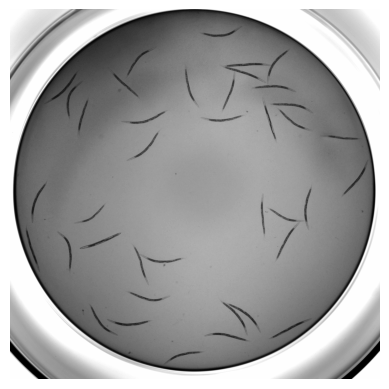

In [4]:
# read in an image
img = tifffile.imread('images/20220811-LM1-p006-m2X_A04.TIF')

# Perform histogram stretching to rescale the pixel values
percentiles = [0.5, 99.5]  # Adjust these percentiles based on your image characteristics
min_val, max_val = np.percentile(img, percentiles)
image_stretched = np.clip((img - min_val) * (255.0 / (max_val - min_val)), 0, 255).astype(np.uint8)

# load a mask
mask = np.load('data/metrics_wellimages2x_pickle/metrics_20220811-LM1-p006-m2X_A04/mask_26.npy')

# Find contours of the 1s in the boolean mask
contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv2.drawContours(image_stretched, contours, -1, (0, 0, 0), 1)  # Draw black outlines on the image

# Display the image with the drawn contours
fig, ax = plt.subplots()
ax.imshow(image_stretched, cmap='gray')
plt.axis('off')
plt.show() # Show the image with the drawn contours

# save it
# Save the final image as a .png file
output_path = 'segmentation_overlays/20220811-LM1-p006-m2X_A04.png'
Image.fromarray(image_stretched).save(output_path) 
